In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import os
os.chdir("..")

df=pd.read_csv("data/comple_n1.csv")

In [3]:
df.head()

,COLLEGE,BRANCH,CATEGORIES,Cutoff_2019,Cutoff_2020,Cutoff_2021,Cutoff_2022,Cutoff_2023,Cutoff_2024
0,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,2AG,0,0,0,371,432.0,475
1,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,GM,0,0,0,298,249.0,355
2,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,SCG,0,0,0,815,1733.0,670
3,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,GMR,0,0,0,1201,0.0,0
4,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,SCR,0,0,0,0,0.0,0


In [4]:
def recommend_colleges(rank, category, branch, df):
    # Filter by category & branch
    filtered_df = df[(df['CATEGORIES'] == category) & (df['BRANCH'] == branch)]
    
    # Find colleges where the cutoff is higher than the given rank
    recommended = filtered_df[filtered_df['Cutoff_Rank'] >= rank]
    
    return recommended[['COLLEGE', 'Cutoff_Rank']].sort_values(by="Cutoff_Rank")


In [5]:
category='GM'
branch='AI Artificial Intelligence'
filtered_df = df[(df['CATEGORIES'] == category) & (df['BRANCH'] == branch)]

In [6]:
df_copy=df.copy()

In [7]:
df_copy["Average"]=df[["Cutoff_2019","Cutoff_2020","Cutoff_2021","Cutoff_2022","Cutoff_2023","Cutoff_2024"]].mean(axis=1)

In [8]:
numerical_cols = df_copy.select_dtypes(include=['number'])

# Compute max for each row
df_copy["Max_Cutoff"] = numerical_cols.max(axis=1)
df_copy["Min_Cutoff"] = numerical_cols.min(axis=1)
df_copy

,COLLEGE,BRANCH,CATEGORIES,Cutoff_2019,Cutoff_2020,Cutoff_2021,Cutoff_2022,Cutoff_2023,Cutoff_2024,Average,Max_Cutoff,Min_Cutoff
0,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,2AG,0,0,0,371,432.0,475,213.000000,475.0,0.0
1,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,GM,0,0,0,298,249.0,355,150.333333,355.0,0.0
2,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,SCG,0,0,0,815,1733.0,670,536.333333,1733.0,0.0
3,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,GMR,0,0,0,1201,0.0,0,200.166667,1201.0,0.0
4,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,SCR,0,0,0,0,0.0,0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
355,N M A M Institutute of Technology,ME Mechanical,GM,6159,15412,17306,2817,2912.0,3024,7938.333333,17306.0,2817.0
356,N M A M Institutute of Technology,ME Mechanical,SCG,7762,0,0,6138,6138.0,6138,4362.666667,7762.0,0.0
357,N M A M Institutute of Technology,ME Mechanical,GMR,6746,0,0,0,0.0,0,1124.333333,6746.0,0.0
358,N M A M Institutute of Technology,ME Mechanical,SCR,0,0,0,7359,8890.0,9008,4209.500000,9008.0,0.0


In [9]:
def recommend_college(rank, category, branch):
    # Filter colleges where cutoff is within a reasonable range
    filtered_df = df_copy[(df_copy['Average'] >= rank - 1000) & (df_copy['Average'] <= rank + 1000) & (df_copy['CATEGORIES'] == category) & (df_copy['BRANCH'] == branch)]
    
    # Sort by cutoff closest to the student's rank
    recommended_colleges = filtered_df.sort_values(by="Average", ascending=True)

    return recommended_colleges[['COLLEGE', 'Average']]

# Example: Get recommendations for a student
rank = 200
category = "GM"
branch = "AI Artificial Intelligence"

recommendations = recommend_college(rank, category, branch)
print(recommendations)


                                               COLLEGE     Average
181                 Siddaganga Institute of Technology    0.000000
217  JSS Science and Technology University(Formerly...    0.000000
253  K L E Dr. M S Sheshagiri College of Engineerin...    0.000000
289               K.L.S. Gogte Institute of Technology    0.000000
37                        R. V. College of Engineering   67.333333
1    University of Visvesvaraya College of Engineering  150.333333
325                  N M A M Institutute of Technology  312.833333
109         Sir M.Visveswaraya Institute of Technology  625.833333


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

x

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

df_copy

NameError: name 'x' is not defined

In [ ]:
college=
branch=
category=



In [11]:
df

,COLLEGE,BRANCH,CATEGORIES,Cutoff_2019,Cutoff_2020,Cutoff_2021,Cutoff_2022,Cutoff_2023,Cutoff_2024
0,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,2AG,0,0,0,371,432.0,475
1,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,GM,0,0,0,298,249.0,355
2,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,SCG,0,0,0,815,1733.0,670
3,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,GMR,0,0,0,1201,0.0,0
4,University of Visvesvaraya College of Engineering,AI Artificial Intelligence,SCR,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...
355,N M A M Institutute of Technology,ME Mechanical,GM,6159,15412,17306,2817,2912.0,3024
356,N M A M Institutute of Technology,ME Mechanical,SCG,7762,0,0,6138,6138.0,6138
357,N M A M Institutute of Technology,ME Mechanical,GMR,6746,0,0,0,0.0,0
358,N M A M Institutute of Technology,ME Mechanical,SCR,0,0,0,7359,8890.0,9008


<Axes: xlabel='Cutoff_2019', ylabel='COLLEGE'>

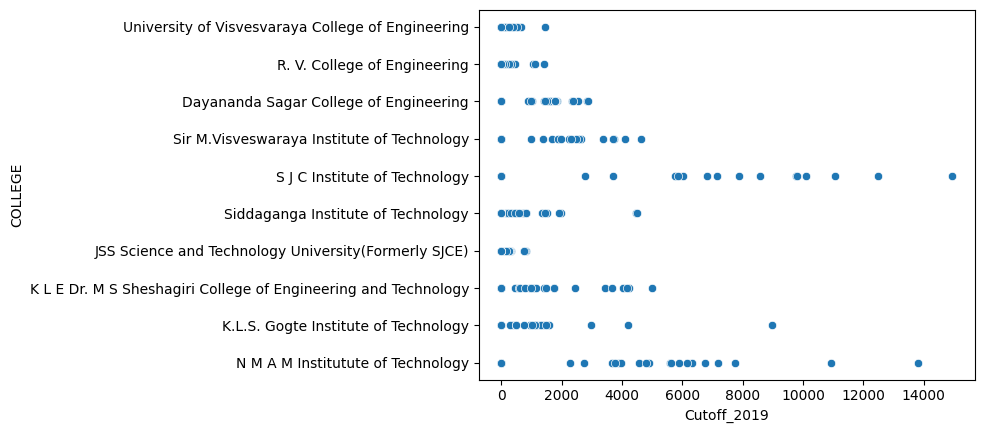

In [17]:
sns.scatterplot(x="Cutoff_2019",y="COLLEGE",data=df)

In [20]:
df["COLLEGE"].unique()

array(['University of Visvesvaraya College of Engineering',
       'R. V. College of Engineering',
       'Dayananda Sagar College of Engineering',
       'Sir M.Visveswaraya Institute of Technology',
       'S J C Institute of Technology',
       'Siddaganga Institute of Technology',
       'JSS Science and Technology University(Formerly SJCE)',
       'K L E Dr. M S Sheshagiri College of Engineering and Technology',
       'K.L.S. Gogte Institute of Technology',
       'N M A M Institutute of Technology'], dtype=object)

In [21]:
df["BRANCH"].unique()

array(['AI Artificial Intelligence', 'CE Civil', 'CS Computers',
       'EC Electronics', 'EE Electrical', 'ME Mechanical'], dtype=object)

In [22]:
df["CATEGORIES"].unique()

array(['2AG', 'GM', 'SCG', 'GMR', 'SCR', 'STG'], dtype=object)

In [50]:
for college,branch,category in zip(colleges,branchs,categorys):
    filter=df.loc[(df["COLLEGE"]==colleges)&(df["BRANCH"]==branchs)&(df["CATEGORIES"]==categorys),["Cutoff_2019","Cutoff_2020","Cutoff_2021","Cutoff_2022","Cutoff_2023","Cutoff_2024"]].values
    print(filter)

ValueError: ('Lengths must match to compare', (360,), (2,))

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_cutoff_trend(df, colleges, branch, category):
    """
    Plots a line chart comparing cutoff trends from 2019 to 2024 for multiple colleges.

    Parameters:
        df (pd.DataFrame): The dataset containing cutoff data.
        colleges (list): List of college names to compare.
        branch (str): Selected branch.
        category (str): Selected category.
    """
    # Define cutoff year columns
    cutoff_years = ["Cutoff_2019", "Cutoff_2020", "Cutoff_2021", "Cutoff_2022", "Cutoff_2023", "Cutoff_2024"]
    
    # Filter data based on branch, category, and selected colleges
    filtered_df = df[
        (df["BRANCH"] == branch) & 
        (df["CATEGORIES"] == category) & 
        (df["COLLEGE"].isin(colleges))
    ]

    # Check if data is available
    if filtered_df.empty:
        print("No data found for the given inputs.")
        return
    
    # Plot cutoff trends for each selected college
    plt.figure(figsize=(10, 6))
    
    for _, row in filtered_df.iterrows():
        plt.plot(cutoff_years, row[cutoff_years], marker="o", linestyle="-", label=row["COLLEGE"])

    # Customize the plot
    plt.xlabel("Year")
    plt.ylabel("Cutoff Score")
    plt.title(f"Cutoff Trend (2019-2024) for {branch}, {category}")
    plt.xticks(rotation=45)
    plt.legend(title="Colleges")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Display the plot
    plt.show()


In [74]:
df["COLLEGE"].unique()

array(['University of Visvesvaraya College of Engineering',
       'R. V. College of Engineering',
       'Dayananda Sagar College of Engineering',
       'Sir M.Visveswaraya Institute of Technology',
       'S J C Institute of Technology',
       'Siddaganga Institute of Technology',
       'JSS Science and Technology University(Formerly SJCE)',
       'K L E Dr. M S Sheshagiri College of Engineering and Technology',
       'K.L.S. Gogte Institute of Technology',
       'N M A M Institutute of Technology'], dtype=object)

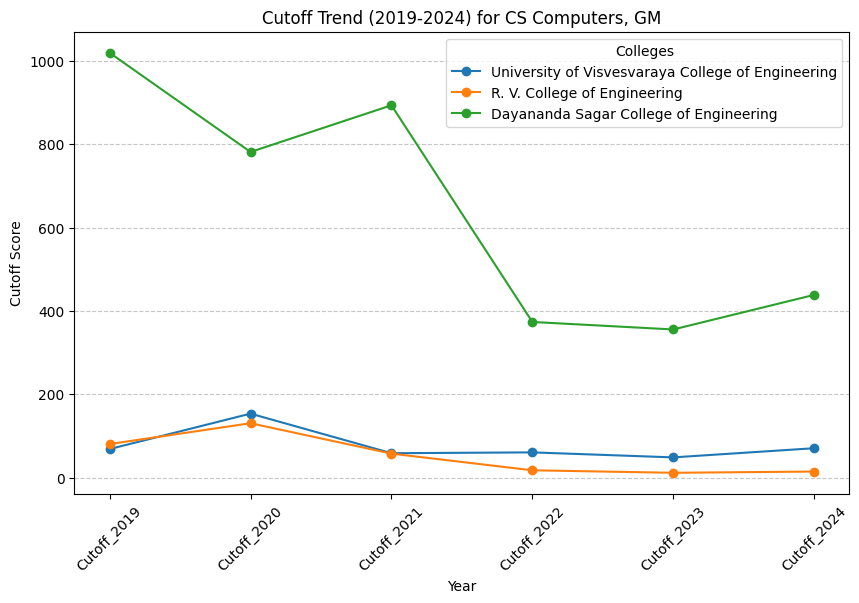

In [75]:
colleges=['R. V. College of Engineering','Dayananda Sagar College of Engineering','University of Visvesvaraya College of Engineering']

branchs='CS Computers'

categorys='GM'
plot_cutoff_trend(df,colleges,branchs,categorys)

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_cutoff_bar(df, colleges, branch, category):
    """
    Plots a bar chart comparing cutoff trends from 2019 to 2024 for multiple colleges.

    Parameters:
        df (pd.DataFrame): The dataset containing cutoff data.
        colleges (list): List of college names to compare.
        branch (str): Selected branch.
        category (str): Selected category.
    """
    # Define cutoff year columns
    cutoff_years = ["Cutoff_2019", "Cutoff_2020", "Cutoff_2021", "Cutoff_2022", "Cutoff_2023", "Cutoff_2024"]
    
    # Filter data based on branch, category, and selected colleges
    filtered_df = df[
        (df["BRANCH"] == branch) & 
        (df["CATEGORIES"] == category) & 
        (df["COLLEGE"].isin(colleges))
    ]

    # Check if data is available
    if filtered_df.empty:
        print("No data found for the given inputs.")
        return
    
    # Set width of bars
    bar_width = 0.15  
    x = np.arange(len(cutoff_years))  # X-axis positions for years

    plt.figure(figsize=(12, 6))

    # Plot bar charts for each college
    for i, (index, row) in enumerate(filtered_df.iterrows()):
        bars = plt.bar(x + i * bar_width, row[cutoff_years], width=bar_width, label=row["COLLEGE"])
        
        # Add numbers on top of bars
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width() / 2, 
                     bar.get_height(), 
                     f'{bar.get_height():.0f}', 
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Customize the plot
    plt.xlabel("Year")
    plt.ylabel("Cutoff Score")
    plt.title(f"Cutoff Comparison (2019-2024) for {branch}, {category}")
    plt.xticks(x + (bar_width * (len(filtered_df) - 1)) / 2, cutoff_years)  # Adjust x-ticks for better alignment
    plt.legend(title="Colleges")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()


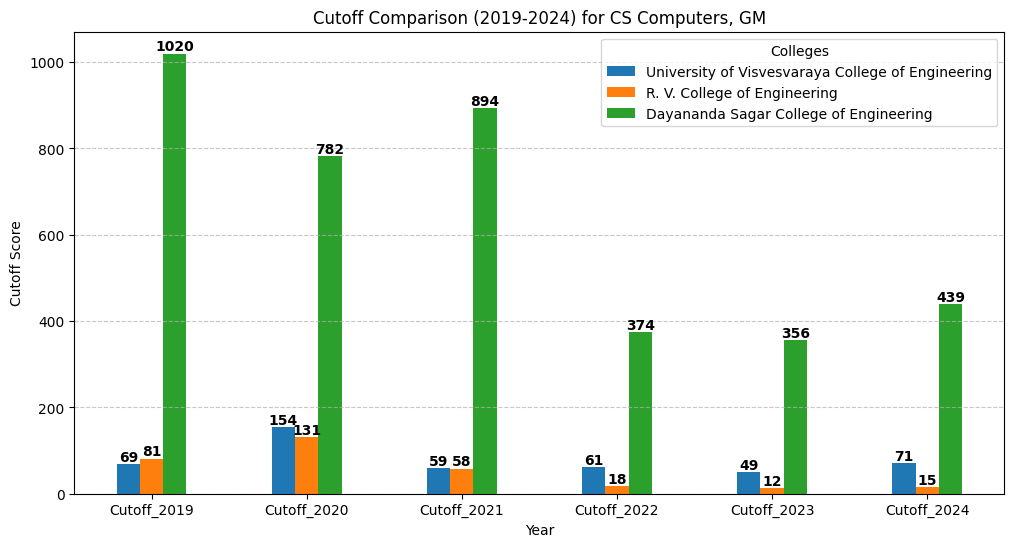

In [71]:
plot_cutoff_bar(df,colleges,branchs,categorys)